# Movie Lines - Sentiment Analysis

## Read Movie Lines Dataset

In [30]:
import pandas as pd

# Define column names
column_names = ['line_id', 'characterID', 'movieID', 'characterName', 'text']

# Read the file with the provided column names
movie_lines = pd.read_csv('data/movie_lines.tsv', sep='\t', encoding='utf-8', header=None, names=column_names, on_bad_lines='skip')

# Print the first few rows to verify
print(movie_lines.head())

  line_id characterID movieID characterName          text
0   L1045          u0      m0        BIANCA  They do not!
1   L1044          u2      m0       CAMERON   They do to!
2    L985          u0      m0        BIANCA    I hope so.
3    L984          u2      m0       CAMERON     She okay?
4    L925          u0      m0        BIANCA     Let's go.


## Sentiment Analysis Using TextBlob

- -1.0 indicates a very negative sentiment
- 0.0 indicates a neutral sentiment
- 1.0 indicates a very positive sentimentt.

In [32]:
from textblob import TextBlob

# Define a function to get sentiment polarity of a text
def get_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except Exception as e:
        return None

# Apply the sentiment analysis to the 'text' column
movie_lines['tb_sentiment'] = movie_lines['text'].apply(get_sentiment)

# Display the first few rows with the new sentiment column
print(movie_lines.head())

  line_id characterID movieID characterName          text  tb_sentiment
0   L1045          u0      m0        BIANCA  They do not!           0.0
1   L1044          u2      m0       CAMERON   They do to!           0.0
2    L985          u0      m0        BIANCA    I hope so.           0.0
3    L984          u2      m0       CAMERON     She okay?           0.5
4    L925          u0      m0        BIANCA     Let's go.           0.0


# Visualize Results

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

Histogram of Sentiment Polarity

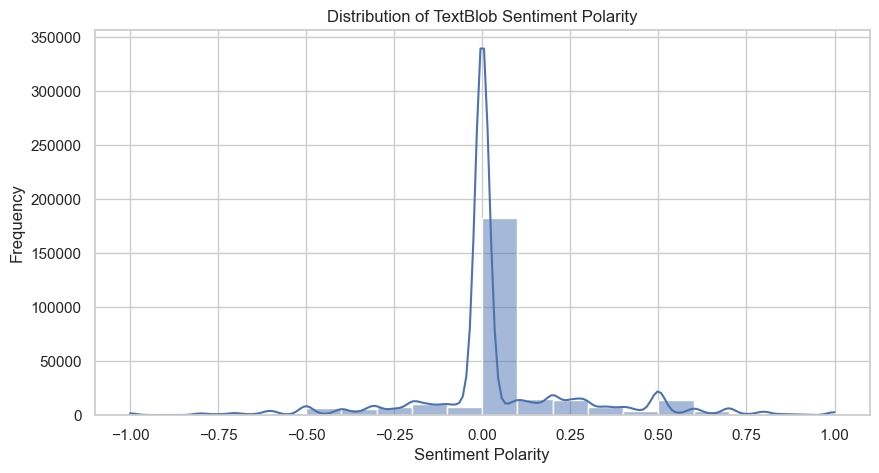

In [36]:

plt.figure(figsize=(10, 5))
sns.histplot(movie_lines['tb_sentiment'], bins=20, kde=True)
plt.title('Distribution of TextBlob Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

Box Plot of Sentiment Polarity

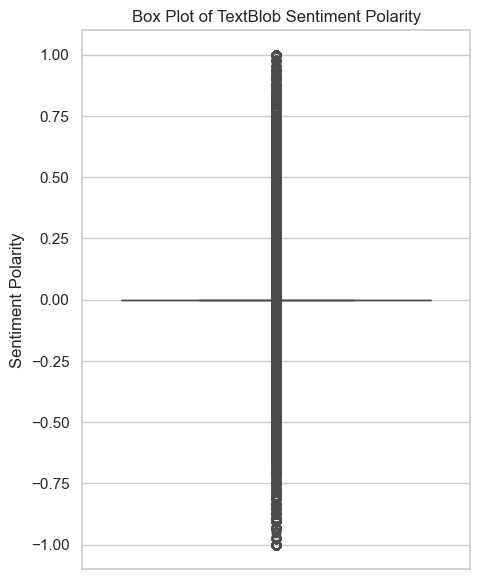

In [38]:
plt.figure(figsize=(5, 7))
sns.boxplot(y=movie_lines['tb_sentiment'])
plt.title('Box Plot of TextBlob Sentiment Polarity')
plt.ylabel('Sentiment Polarity')
plt.show()

Violin plot for the sentiment polarity

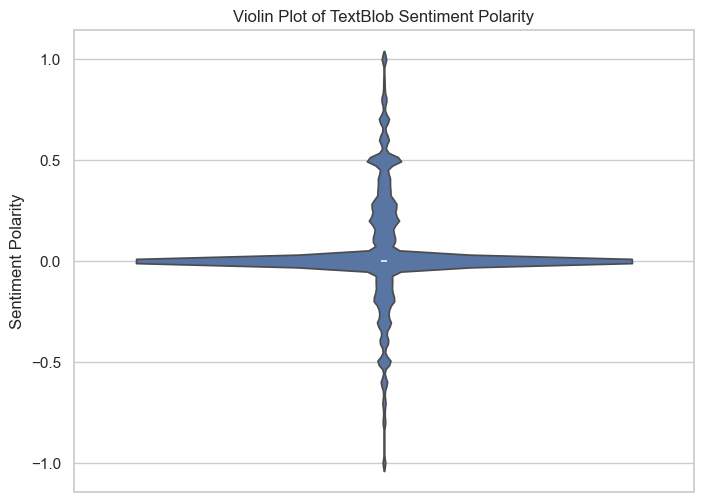

In [40]:
plt.figure(figsize=(8, 6))
sns.violinplot(y=movie_lines['tb_sentiment'])
plt.title('Violin Plot of TextBlob Sentiment Polarity')
plt.ylabel('Sentiment Polarity')
plt.show()

Scatter Plot (Line Index vs. Sentiment Polarity)

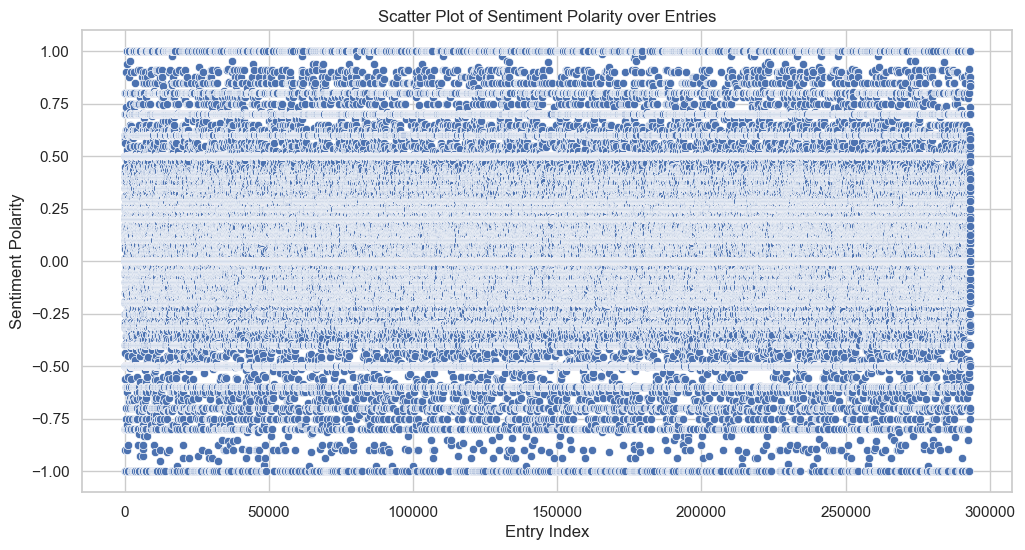

In [42]:
plt.figure(figsize=(12, 6))
movie_lines = movie_lines.reset_index()  # ensure a sequential index is available
sns.scatterplot(x='index', y='tb_sentiment', data=movie_lines)
plt.title('Scatter Plot of Sentiment Polarity over Entries')
plt.xlabel('Entry Index')
plt.ylabel('Sentiment Polarity')
plt.show()

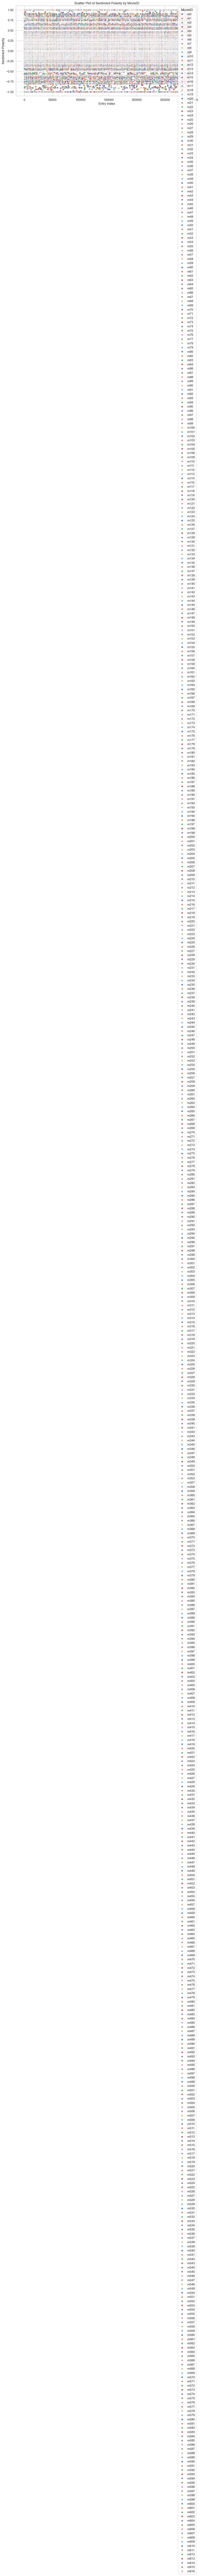

In [48]:
# Ensure a sequential index is used for plotting
movie_lines_reset = movie_lines.reset_index()

plt.figure(figsize=(12, 6))
sns.scatterplot(x='index', y='tb_sentiment', hue='movieID', data=movie_lines_reset, palette='deep')
plt.title('Scatter Plot of Sentiment Polarity by MovieID')
plt.xlabel('Entry Index')
plt.ylabel('Sentiment Polarity')
plt.legend(title='MovieID')
plt.show()